# Convergence des méthodes numériques

On modélise le pendule ordinaire à l'aide de l'Hamiltonien:
$$
H(p, q)\,=\,\frac {p^2}2-\cos(q)~.
$$
Intégrer les équations du mouvement correspondantes avec la méthode **Dormand-Prince 5 (DOPRI5)** de la [librairie BOOST](https://www.boost.org/doc/libs/1_86_0/libs/numeric/odeint/doc/html/boost_numeric_odeint/getting_started/overview.html). 

Pour cette méthode, il faut fixer les tolérances absolue et relative de l'algorithme: 
$$
\mathrm{atol}=10^{-15},\quad\mathrm{rtol}=10^{-10}.
$$ 
La solution ainsi calculée sera notre référence à laquelle on comparera les autres méthodes pour calculer l'erreur.

Implémenter également les méthodes suivantes:

 * Euler explicite d'ordre 1 et 2
 * Euler implicite d'ordre 1
 * Störmer-Verlet d'ordre 1 et 2

 Choisir les conditions initiales $(q_0, p_0)=(0.0,1.98)$, intégrer pour $0\le t\le 30$, choisir plusieurs pas de temps $h$ dans l'intervalle $10^{-5}\le h \le 10^{-1}$ (exemple: ${h=.1(.2)^n:n=0,\dots,5}$). 
 
 Il n'est pas nécessaire de sauver tous les pas de temps dans les fichiers de sortie, seulement à un intervalle $\delta t$ identique pour toutes les méthodes (également pour **DOPRI5**): $\delta t=0.1$.



## Calcul de la vitesse de convergence

Pour chaque méthode, la solution calculée $(q_n,p_n)$ est comparée à la solution par **DOPRI5** $(\hat q_n, \hat p_n)$, et on calcule la norme de la différence:
$$
\mathrm{Err}_n=\sqrt{(q_n-\hat q_n)^2+(p_n-\hat p_n)^2},
$$
puis on prend la moyenne sur $t>25$:
$$
\mathrm{Err}=\frac 1{50}\sum_{t_n>25}\mathrm{Err}_n.
$$
Afficher $E$ en fonction de $h$, en échelle logarithmique, pour les différentes méthodes implémentées. 

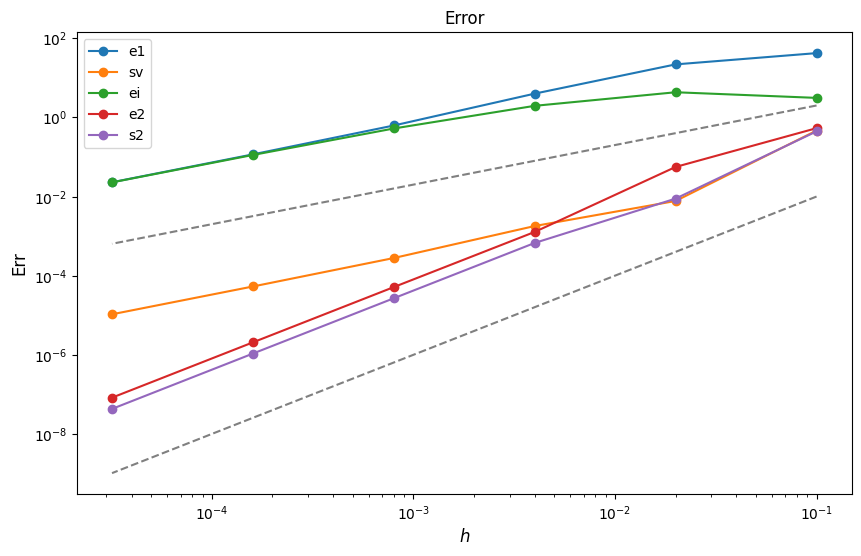

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ref = np.loadtxt("build/pendule_dp5.txt")
time = ref[:,0]

hvals = 1e-1*(0.2**np.array([0,1,2,3,4,5]))
methods = ["e1", "sv", "ei", "e2", "s2"]

errs = np.zeros((len(hvals), len(methods)))
for nm,m in enumerate(methods):
    for nh,h in enumerate(hvals):
        test1 = np.loadtxt(f"build/pendule_{nh}_{m}.txt")
        n2 = np.sqrt((test1[250:,1]-ref[250:,1])**2+(test1[250:,2]-ref[250:,2])**2)
        errs[nh,nm] = np.mean(n2)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Error")
plt.yscale("log")
plt.xscale("log")
ax.set_ylabel("Err", fontsize=12)
ax.set_xlabel("$h$", fontsize=12)
for nm,m in enumerate(methods):
    ax.plot(hvals, errs[:,nm], 'o-', label=m)
ax.plot(hvals, 20*hvals, '--', color='grey')
ax.plot(hvals, hvals**2, '--', color='grey')
ax.legend()
plt.show()

## Conservation de l'énergie

Pour chacune des méthodes implémentée (choisir une des valeurs de $h\approx 10^{-3}$), calculer l'énergie de la solution (l'Hamiltonien $E_n=H(p_n,q_n)$) et représenter $E_n$ en fonction de $t_n=n\delta t$.

Représenter également la solution $q_n$ en fonction de $t_n$.

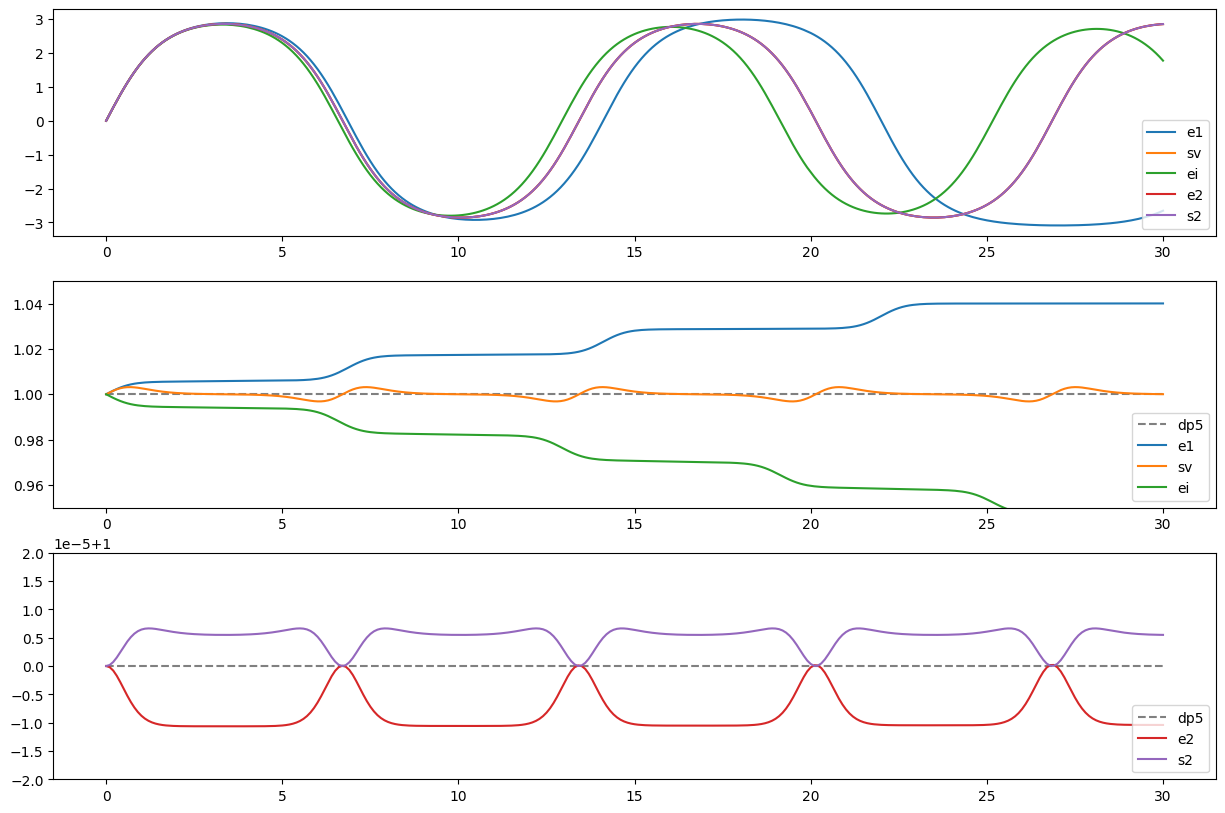

In [2]:
fig, ax = plt.subplots(3,1,figsize=(15,10))
for m in methods:
    test1 = np.loadtxt(f"build/pendule_2_{m}.txt")
    ax[0].plot(test1[:,0], test1[:,1], '-', label=m)
ax[0].legend(loc="lower right")

def Hamilton(x):
    return 0.5*x[:,2]**2-np.cos(x[:,1])

H0 = Hamilton(ref)

ax[1].set_ylim(.95,1.05)
ax[1].plot(time, H0/H0[0], '--', color='grey', label='dp5')
for m in methods[:3]:
    test1 = np.loadtxt(f"build/pendule_2_{m}.txt")
    ax[1].plot(test1[:,0], Hamilton(test1)/H0[0], '-', label=m)
ax[1].legend(loc="lower right")

ax[2].set_ylim(.99998,1.00002)
ax[2].plot(time, H0/H0[0], '--', color='grey', label='dp5')
nm = 3
for m in methods[3:]:
    test1 = np.loadtxt(f"build/pendule_2_{m}.txt")
    ax[2].plot(test1[:,0], Hamilton(test1)/H0[0], '-', color=f"C{nm}", label=m)
    nm += 1
ax[2].legend(loc="lower right")
plt.show()